In [1]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DEVICE:  cuda


[*********************100%***********************]  1 of 1 completed

read  6550  lines of data for ticker:  XLE


<Axes: xlabel='Date', ylabel='Open'>

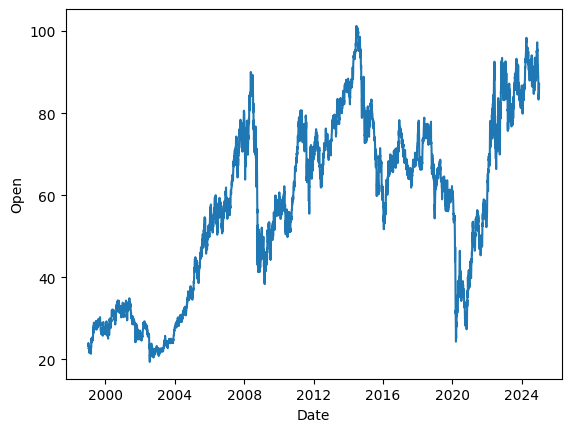

In [6]:
df_xle = get_cleaned_df('XLE','1990-01-01','2025-01-05')
sns.lineplot(df_xle,x="Date",y="Open")

[*********************100%***********************]  1 of 1 completed

read  6550  lines of data for ticker:  XLF


<Axes: xlabel='Date', ylabel='Open'>

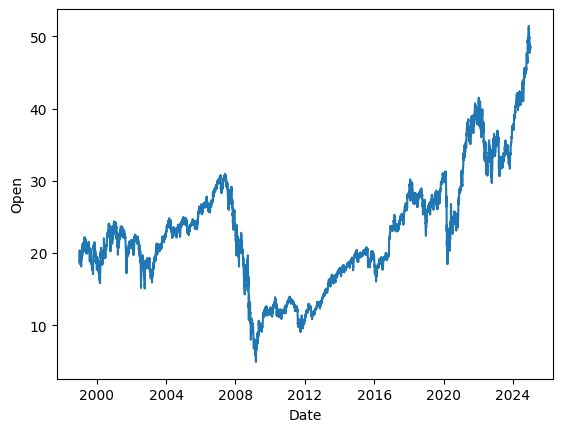

In [5]:
df_xlf = get_cleaned_df('XLF','1990-01-01','2025-01-05')
sns.lineplot(df_xlf,x="Date",y="Open")

[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLK


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLU


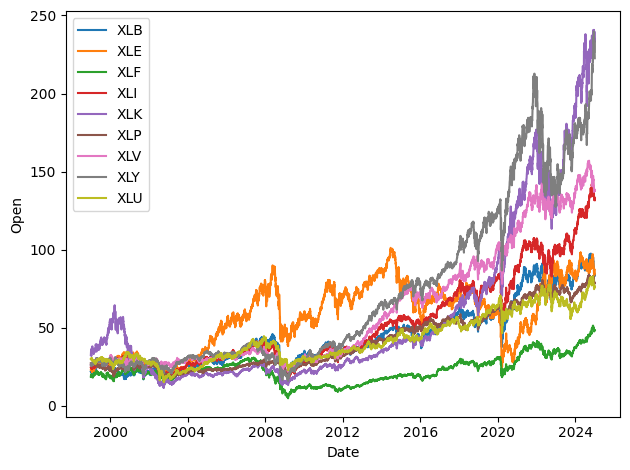

In [5]:
etfs = ['XLB','XLE','XLF','XLI','XLK','XLP','XLV','XLY','XLU']
for etf in etfs:
    df = get_cleaned_df(etf,'1990-01-01','2025-01-05')
    sns.lineplot(df,x="Date",y="Open",label=etf)
    plt.legend()
    plt.tight_layout()
    #plt.show()

[*********************100%***********************]  1 of 1 completed

read  6548  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLK


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLU


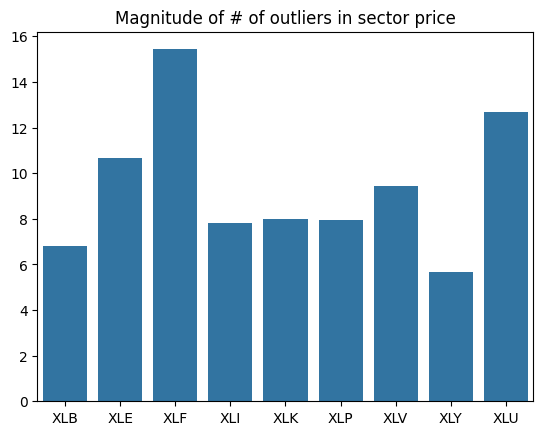

In [6]:
kurts = []
for etf in etfs:
    df = get_cleaned_df(etf,'1990-01-01','2025-01-01')
    kurt = ((df["Close"]/df["Close"].shift(1))**2).kurt()
    kurts.append(kurt)

sns.barplot(x=etfs,y=kurts)
plt.title("Magnitude of # of outliers in sector price")
plt.show()

In [31]:
#make scatterplot analyzing kurtosis and return difference

df_final = pd.read_csv('../output/analysis/final_df.csv')
atrs = df_final.loc[df_final["Metric"]=="ATR"].groupby("ETF")["MAPE"].mean()
sds = df_final.loc[df_final["Metric"]=="SD_Squared_Returns"].groupby("ETF")["MAPE"].mean()
diffs = atrs/sds
diffs_to_plot = np.array(diffs)

<Axes: >

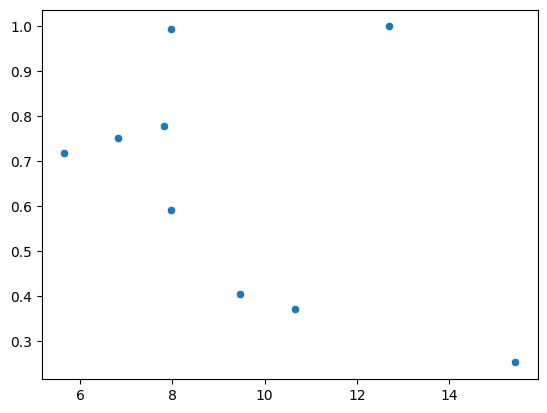

In [32]:
sns.scatterplot(x=kurts,y=diffs_to_plot)